# [MÉTODO DE EULER](https://en.wikipedia.org/wiki/Euler_method)

A veces no existe una solución analítica para una ecuación diferencial de primer orden y una solución numérica
se debe buscar. La ecuación diferencial de primer orden $\dfrac{dy}{dx}=f(x, y)$ con condición inicial $y(x_0)=y_0$ proporciona la pendiente $f(x_0, y_0)$ de la recta tangente a la curva solución $y=y(x)$ en el punto $(x_0, y_0)$.
Con un tamaño de paso pequeño $∆x = x_1 - x_0$, la condición inicial $(x_0, y_0) $se puede avanzar hasta $(x_1, y_1)$ a lo largo de la línea tangente, esto se denomina el **método de Euler** (ver figura):

$$y_1=y_0+∆xf(x_0, y_0)$$

<div align="center"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Euler_method.svg/1280px-Euler_method.svg.png" heigth="20" width="300"</img> 

**EJEMPLO DE LA FUNCIÓN $x'=2t$**

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

def EulerM(f,x0,n,ti,tf):   
    t = np.linspace(ti,tf,n) 
    h = (tf-ti+1)/n
    x = np.zeros(n) 
    x[0] = x0
    for i in range(n-1): 
        x[i+1] = x[i] + h*f(t[i],x[i])
    return x,t 

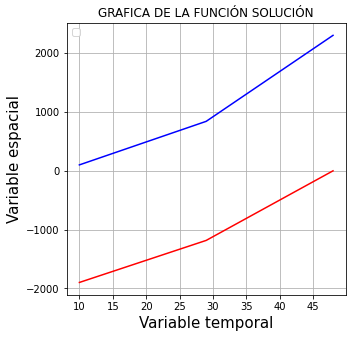

In [ ]:
f = lambda t,x: 2*t
x0 = 1 
n = 3  
ti = 50^2 
tf = 10
sol,t =EulerM(f,x0,n,ti,tf)

plt.figure(figsize=(5,5))

plt.plot(t,sol,'r-')    # Solucion numérica 
plt.plot(t,t**2+1,'b-') # Solucion analítica

plt.xlabel("Variable temporal",fontsize=15)
plt.ylabel("Variable espacial",fontsize=15)
plt.title("GRAFICA DE LA FUNCIÓN SOLUCIÓN")

plt.legend()
plt.grid()
plt.show()

Como podemos observar el método de Euler no captura de manera precisa la solución real del problema.

**DIVERGENCIA DEL MÉTODO**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


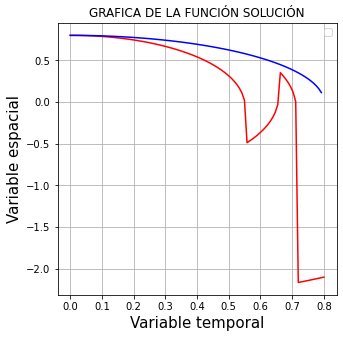

In [ ]:
f = lambda t,x: -t/x 
x0 = 4/5 
n = 100 
ti = 0 
tf = 0.8
sol,t=EulerM(f,x0,n,ti,tf)

plt.figure(figsize=(5,5))

plt.plot(t,sol,"r-")
plt.plot(t,np.sqrt(16/25-t**2),"b-")

plt.xlabel("Variable temporal",fontsize=15)
plt.ylabel("Variable espacial",fontsize=15)
plt.title("GRAFICA DE LA FUNCIÓN SOLUCIÓN")

plt.legend()
plt.grid()
plt.show()

# **Método de Taylor**
#### Órdenes de convergencia

Lo aplicamos en el intervalo $[0, 5]$ al problema 
$$
x'(t) = 2x(t) - 5 \sin(t), \quad x(0) = 1
$$
que tiene solución exacta $x(t) = 2 \sin(t) + \cos(t)$.

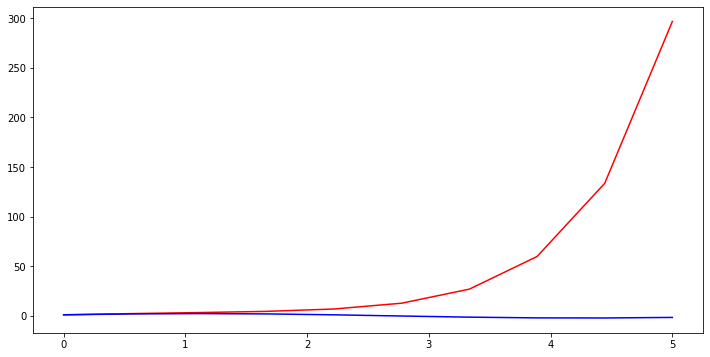

In [ ]:
# f,x0,n,ti,tf
def f(t, x):
    y = 2*x-5*np.sin(t)
    return(y)

def sol(t):
    return(2 * np.sin(t) + np.cos(t))

plt.figure(figsize=(12,6))
t1=np.linspace(0,5,100)

x1,t1 = EulerM(f, 1, 10, 0, 5)  #f,x0,n,ti,tf argumentos para el metodo de Euler

plt.plot(t1, x1,'r')
plt.plot(t1, sol(t1),'b')
plt.show()

**Repetir** el análisis anterior para el método de Taylor:
$$
x_i = x_{i-1} + h f(t_{i-1}, x_{i-1}) + \frac{h^2}{2} (f_t(t_{i-1}, x_{i-1}) + f_x(t_{i-1}, x_{i-1}) f(t_{i-1}, x_{i-1}))
$$

In [ ]:
def taylor2(f, ft, fx, t0, tn, x0, n):
    t = np.linspace(t0,tn,n+1)
    x = np.zeros(n+1)
    x[0] = x0
    h = (tn-t0)/n
    for i in range(1,n+1):
        x[i] = x[i-1]+h*f(t[i-1], x[i-1])+h**2/2*(ft(t[i-1], x[i-1])+fx(t[i-1], x[i-1])*f(t[i-1], x[i-1]))
    return((t,x))

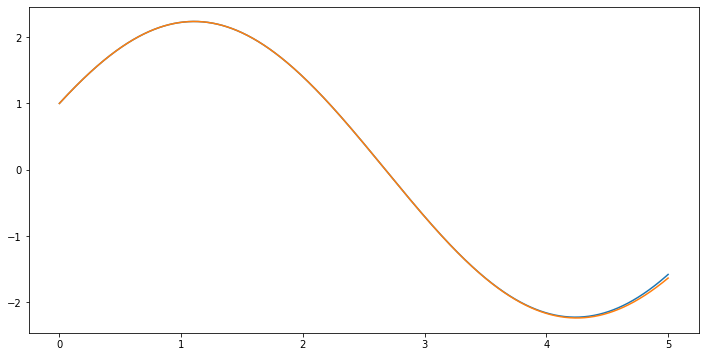

In [ ]:
def fx(t, x):
    y = 2
    return(y)

def ft(t, x):
    y = -5*np.cos(t)
    return(y)

plt.figure(figsize=(12,6))
(t2, x2) = taylor2(f, ft, fx, 0, 5, 1, 1001)
plt.plot(t2,x2) #Metodo de Taylor
plt.plot(t2,sol(t2)) #Solucion exacta
#plt.plot(t1,x1) #Metodo De Euler
plt.show()

.
# $$Runge Kutta$$

<div align="center"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/Runge-Kutta_slopes.svg/450px-Runge-Kutta_slopes.svg.png" heigth="20" width="300"</img> 

Imagen sacada de wikipedia:https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/Runge-Kutta_slopes.svg/450px-Runge-Kutta_slopes.svg.png
</div>


El metodo de solución conocido por Runge-Kutta es un método numerico creado por Carl Runge y Wilhelm Kutta en el cual se basa en el promedio de cada linea tangente de la parte media alta y baja de la función. Luego se promedia para obtener la solución mas exacta de la función diferencial.

Este metódo es mas exacto debido a lo anterior, pues soluciona el gran problema que tenia el metódo de Euler al tener funciones con demasiadas curvas o cambios en las pendientes.

Para mostrar su funcionamiento se propone la solución a las siguientes ecuaciones con el metodo de RK4 y ver la grafica constrastada con el método anteriormente expuesto:

[Fuente](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def RK4(f,x0,t,n):
    t=np.linspace(T[0],T[1],n)
    h=abs(t[1]-t[0])
    x=np.empty(n)
    x[0]=x0
    
    for i in range(n-1):
        
        k1=f(t[i],x[i])
        k2=f(t[i]+1/2*h,x[i]+h*1/2*k1)
        k3=f(t[i]+1/2*h,x[i]+h*1/2*k2)
        k4=f(t[i+1]    ,x[i]+h*k3)
        
        x[i+1]=x[i]+h*(1/6*k1+1/3*k2+1/3*k3+1/6*k4)
    return t,x


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


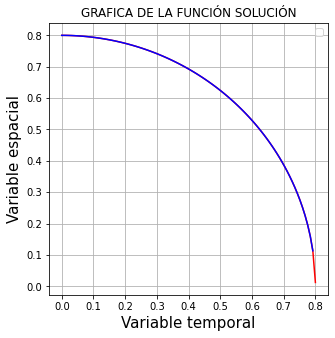

In [ ]:
f = lambda t,x: -t/x 
x0 = 4/5
n = 100 
T=[0.0,0.8]
t,sol=RK4(f,x0,T,n)


plt.figure(figsize=(5,5))

plt.plot(t,sol,"r-")
plt.plot(t,np.sqrt(16/25-t**2),"b-")

plt.xlabel("Variable temporal",fontsize=15)
plt.ylabel("Variable espacial",fontsize=15)
plt.title("GRAFICA DE LA FUNCIÓN SOLUCIÓN")

plt.legend()
plt.grid()
plt.show()

**TAREA**

Describa los modelos continuos de primer orden trabajados en el curso de matemáticas III, y determine soluciones a problemas especificos:

1.   Modelo exponencial.
2.   Modelo de Ley de enfriamiento.
3.   Modelo de mezclas.
4.   Modelo poblacional logístico.

# EJERCICIOS

1. **Modelo Bungee** 
  $\frac{dv}{dt}=g-\frac{Kv^2}{m} \space
  {v_0}=0$  con $g=9.8$, $K=0.028$,  $m=10$ y $T=[0,20]$.

2. **Modelo Malthusiano** $\frac{dP}{dt}=kP \space {P_0}=2$ 
3. **Modelo logístico** $\frac{dp}{dt}=$$kp(1- \frac{k}{s})\space {p_0}=2$  con $k=0.011$, $s=20000$ y $t=[0,100]$

4. $\frac{dx}{dt}=e^{-t^2}sen(x) \space {x_0}=3$ 

5. $\frac{dx}{dt}=tanh(xt)+ln(x^{2}t)e^{-t^2} \space x(1)=2$, sobre el intervalo $t=[1,3]$.


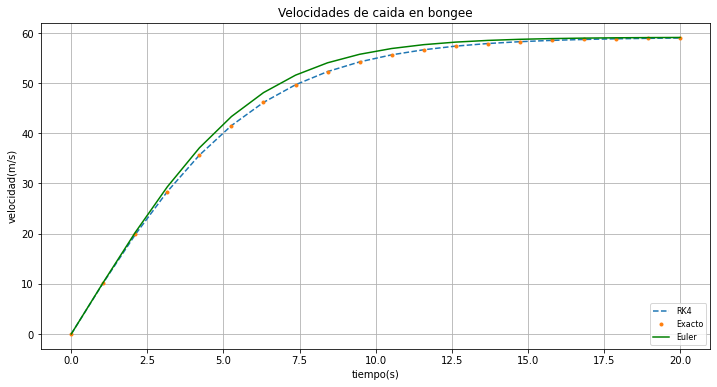

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 

################################## Método numérico RK4 ###################################################

def RK4(f,x0,t,n):
    t=np.linspace(T[0],T[1],n)
    h=abs(t[1]-t[0])
    x=np.empty(n)
    x[0]=x0
    
    for i in range(n-1):
        
        k1=f(t[i],x[i])
        k2=f(t[i]+1/2*h,x[i]+h*1/2*k1)
        k3=f(t[i]+1/2*h,x[i]+h*1/2*k2)
        k4=f(t[i+1]    ,x[i]+h*k3)
        
        x[i+1]=x[i]+h*(1/6*k1+1/3*k2+1/3*k3+1/6*k4)
    return t,x

################################## Método numérico Euler ###################################################
def EulerM(f,x0,t,n):   
    t=np.linspace(T[0],T[1],n)
    h = (T[1]-T[0]+1)/n
    x1=np.empty(n) 
    x1[0] = x0
    for i in range(n-1): 
        x1[i+1] = x1[i] + h*f(t[i],x1[i])
    return t,x1 

K=0.028#constante de rozamiento del aire
g=9.8#gravedad de la tierra
m=10#masa 
##################################Valores Numericos###################################################

v0=0# se dice que el valor de v0 es 0 
n=20# se dice el numero de datos totales que se quiere
T=[0,20]#Tiempo de la función
# se crea una funcion lambda con valores t,x y la funcion que se va a evaluar en el metodo de RK4
fRBon=lambda t,v:g-((K*v**2)/m)# definicion de la funcion

##################################solucion de las ecuaciones#########################################

t,solRkBon=RK4(fRBon,v0,T,n)# se llama el metodo para la solución
t,solEMBon=EulerM(fRBon,v0,T,n) # se llama el metodo para la solución
solBonReal=(59.1608*np.exp(0.3313*t) - 59.1608)/(np.exp(0.3313*t) + 1)#Solución exacta

##################################Impresion de las graficas##########################################

plt.figure(figsize=(12,6))#Tamaño de la grafica del metodo numerico
plt.plot(t,solRkBon,'--',t,solBonReal,'.',t,solEMBon,'g' ) #grafica del método vs la solución analítica
plt.title("Velocidades de caida en bongee")#coloca un titulo al grafico
plt.xlabel("tiempo(s)")#coloca la etiqueta al eje x
plt.ylabel("velocidad(m/s)")#coloca la etiqueta al eje y
plt.grid()
plt.legend(("RK4","Exacto","Euler" ),prop={'size':8},loc='lower right')# crea las leyendas de los
plt.show()

Para lo siguiente, empleemos el **modelo Poblacional**
$$\frac{dP(t)}{dt}=kP(t),\text{          }P(t_{0})=P_{0}$$
Supongamos que $k=0.3$ y $P_0=2$. Pero recuerda que este problema se puede solucionar analíticamente a través de la fórmula $P(t)=P_0e^{kt}$, el cual para nuestro caso resulta $P(t)=2e^{0.3t}.$

Observemos ahora la solución de las ecuación usando el método de Euler y el método RK4 y por medio del error absoluto, error relativo y el error cuadratico medio de cada una de las soluciones, determinemos el óptimo método.


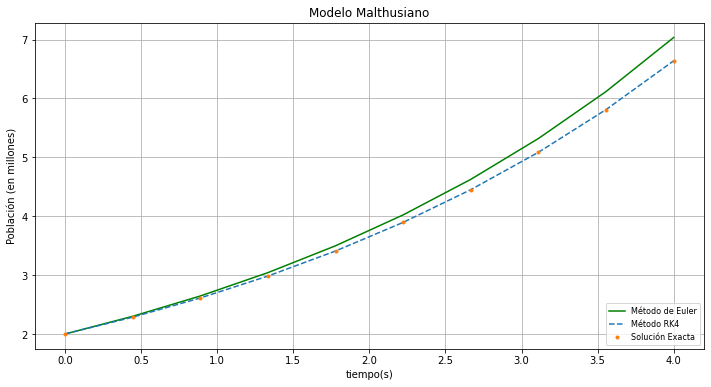

In [ ]:
k=0.3
f= lambda t,P: k*P
T=[0,4]
x0=2
n=10

t,P =EulerM(f,x0,T,n)
t,P1=RK4(f,x0,T,n)  
P_ex=x0*np.exp(k*t)

plt.figure(figsize=(12,6))#Tamaño de la grafica del metodo numerico
plt.plot(t,P,'g',t,P1,'--', t,P_ex,'.')#grafica del método vs la solución analítica
plt.title("Modelo Malthusiano")#coloca un titulo al grafico
plt.xlabel("tiempo(s)")#coloca la etiqueta al eje x
plt.ylabel("Población (en millones)")
plt.grid()
plt.legend(("Método de Euler","Método RK4","Solución Exacta",),prop={'size':8},loc='lower right')
plt.show()

# TIPOS DE ERRORES

1. El **error absoluto** de cada medida será la diferencia entre cada una de las medidas y ese valor tomado como exacto (la media aritmética).

$$Error_{abs} = \lvert y_{real}-y_{datos}\rvert$$

2. El **error relativo** de cada medida será el error absoluto de la misma dividido por el valor tomado como exacto (la media aritmética).
$$Error_{rel} = \dfrac{Error_{abs}}{\vert y_{real}\vert}$$

3. El **error cuadrático medio** (RMSE) mide la cantidad de error que hay entre dos conjuntos de datos. En otras palabras, compara un valor predicho y un valor observado o conocido.
$$ECM=\displaystyle\sqrt{\dfrac{1}{n}\sum_{\#\space  datos} (y_{real}-y_{datos})^2}$$

In [ ]:
def E_Abs(real, aprox):
  er_abs=abs(real-aprox)
  return er_abs

def E_Rel(real, aprox):
  er_rel=abs(real-aprox)/real
  return er_rel

def ECM(real, aprox):
  ecm=np.sqrt(((real-aprox)**2).mean())
  return ecm


Pongamos a prueba nuestras funciones de errores, con un par de arreglos muy próximos.

In [ ]:
x=np.array([2,3,4,5])
y=np.array([2.1,3.4,3.8,4.9])
era=E_Abs(x, y)
err=E_Rel(x, y)
Ecm=ECM(x, y)

print("Los errores absolutos, relativos a", era, err)
print(Ecm)

Los errores absolutos, relativos a [0.1 0.4 0.2 0.1] [0.05       0.13333333 0.05       0.02      ]
0.23452078799117143


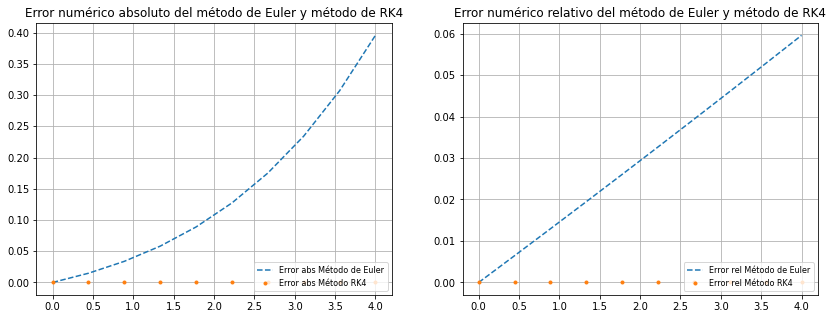

In [ ]:
erra=E_Abs(P_ex, P)
Erra=E_Abs(P_ex, P1)
erra1=E_Rel(P_ex, P)
Erra1=E_Rel(P_ex, P1)

plt.figure(figsize=(14,5))

plt.subplot(121)
plt.plot(t,erra,'--',t,Erra,'.')
plt.title("Error numérico absoluto del método de Euler y método de RK4")
plt.grid()
plt.legend(("Error abs Método de Euler","Error abs Método RK4"),prop={'size':8},loc='lower right')

plt.subplot(122)
plt.plot(t,erra1,'--',t,Erra1,'.')#grafica del método vs la solución analítica
plt.title("Error numérico relativo del método de Euler y método de RK4")#coloca un titulo al grafico
plt.grid()
plt.legend(("Error rel Método de Euler","Error rel Método RK4"),prop={'size':8},loc='lower right')


plt.show()

Pero el error cuadrático medio sigue siendo pequeño, independientemente del método numérico empleado

In [ ]:
erra21=ECM(P_ex, P)
print("El error cuadrático medio para cuando usamos el método de Euler es", erra21)

erra22=ECM(P_ex, P1)
print("El error cuadrático medio para cuando usamos el método de RK4 es", erra22)

El error cuadrático medio para cuando usamos el método de Euler es 0.19098330140104686
El error cuadrático medio para cuando usamos el método de RK4 es 9.10449071444483e-06


# **EJERCICIO EN CLASE**

Es sabido que no existe una función elemental que solucione el problema $\dfrac{dy}{dx}=e^{-x^2}$ con condición inicial $x_0=0$ e $y_0=0$. Describa los métodos de Euler y de Runge-Kutta para este caso, y determine cual gráfico representa mejor la solución. Para este fin considere los errores absolutos, relativos y el error cuadrático medio.

In [ ]:
#Escribe código aquí.